In [1]:
# Mehmet Salim Turgut 
#20820 msalim@sabanciuniv.edu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

from os.path import join
from pprint import pprint

import reverse_geocoder as rg
import geopy as gp

path="./data"
file="taxi-trips.csv"

df=pd.read_csv(join(path,file)) #the excel file opened and read
df.head()



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [3]:
print(df.columns) #prints the col names-these will be used for identify the users

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [4]:
row,col=df.shape #we have too much row and less col. That means we are using columns as identifiers and rows determine the users of taxi
print("number of rows: {}, number of columns: {}".format(row, col))

number of rows: 118185, number of columns: 11


In [5]:
 df.dtypes # we have too much float and integer type columns. Others are string object which can be converted to data object. The float and int types allow us to calculate other columns such that distance and districts
    

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.isnull().sum() #number of NANs

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.describe() #descriptive summarize of data 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


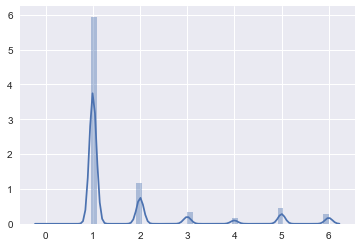

In [8]:

sns.distplot(df["passenger_count"].values, norm_hist=True) #show the distrubition of pass_count
plt.show()

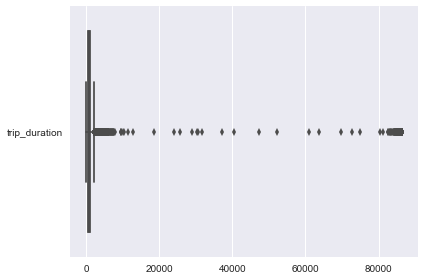

In [9]:

plt.subplot() 
sns.boxplot(data=df[["trip_duration"]], orient="h")

plt.tight_layout()  # auto. positioning of subplots
plt.show() #the distribution of trip duration


In [10]:

dfc=df.copy()
x=dfc[["pickup_latitude","pickup_longitude"]].values
temp=[]
for i in x:
    temp.append(tuple(i))
print(temp[0])

res = rg.search(temp)
print(res[0])
temp2=[]

for j in res:
    temp2.append(j["name"]) # while searching for admin2 sometimes the reverse_geocoder returns ' '. Therefore we choose the name parameter 
    
df["pickup_district"]=temp2

(40.76793670654297, -73.98215484619139)
Loading formatted geocoded file...
OrderedDict([('lat', '40.78343'), ('lon', '-73.96625'), ('name', 'Manhattan'), ('admin1', 'New York'), ('admin2', 'New York County'), ('cc', 'US')])


In [11]:
df #there some 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City


In [12]:

dfc=df.copy()
x=dfc[["dropoff_latitude","dropoff_longitude"]].values
temp3=[]
for i in x:
    temp3.append(tuple(i)) # we changed the list value to tuple for implementing 
print(temp[0])

res = rg.search(temp)
print(res[0])
temp4=[]

for j in res:
    temp4.append(j["name"]) # while searching for admin2 sometimes the reverse_geocoder returns ' '. Therefore we choose the "name" parameter 
    
df["dropoff_district"]=temp2

(40.76793670654297, -73.98215484619139)
OrderedDict([('lat', '40.78343'), ('lon', '-73.96625'), ('name', 'Manhattan'), ('admin1', 'New York'), ('admin2', 'New York County'), ('cc', 'US')])


In [13]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,Hoboken
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Manhattan
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,Long Island City


In [14]:
print("Top 5 most visited--pickup districts:")# the most common places to go with taxi
dfc = df["pickup_district"]
print(dfc.value_counts().nlargest(5))

Top 5 most visited--pickup districts:
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


In [15]:
print("Top 5 most departured--dropoff districts:")# the most common places to departure with taxi
dfc = df["dropoff_district"]
print(dfc.value_counts().nlargest(5))

Top 5 most departured--dropoff districts:
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: dropoff_district, dtype: int64


In [16]:
from geopy import distance as dist

distance = [] #new distance column will be made

for i in range(len(temp)):
    distance.append(dist.great_circle(temp[i], temp3[i]).miles) # the distance calculated as miles

df["distance"] = distance
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City,3.182147
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken,0.927234
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan,1.225473
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023


In [17]:
from datetime import time 

# insert time_of_day column

timeofday = [] # stores all pickup times

time_of_day = [] # column to be added to df

for i in range(len(df["pickup_datetime"])):#our pickup datetime is string we will manipulate the strings
    start_index = df["pickup_datetime"][i].find(":")-2
    time = df["pickup_datetime"][i][start_index:len(df["pickup_datetime"][i])]
    timeofday.append(time)
    
my_parameter = ""
    
def sort_time(my_parameter): #dividing the time 5 pieces
    if("07:00:00"<=my_parameter<"09:00:00"):
        return "rush hour morning"
    elif("09:00:00"<=my_parameter<"16:00:00"):
        return "afternoon"
    elif("16:00:00"<=my_parameter<"18:00:00"):
        return "rush hour evening"
    elif("18:00:00"<=my_parameter<"23:00:00"):
        return "evening"
    else:
        return "latenight"

    
for i in range(len(timeofday)):
    if(sort_time(timeofday[i])=="rush hour morning"):
        time_of_day.append("rush hour morning")
    elif(sort_time(timeofday[i])=="afternoon"):
        time_of_day.append("afternoon")
    elif(sort_time(timeofday[i])=="rush hour evening"):
        time_of_day.append("rush hour evening")
    elif(sort_time(timeofday[i])=="evening"):
        time_of_day.append("evening")
    elif(sort_time(timeofday[i])=="latenight"):
        time_of_day.append("latenight")
        
df["time_of_day"] = time_of_day #creating the new time of day coloumn

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken,0.927234,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon


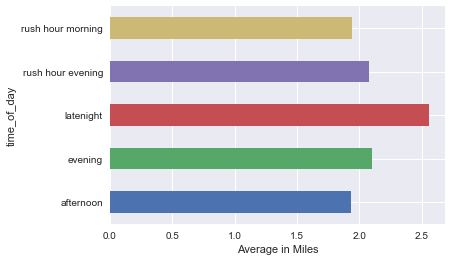

In [18]:
frp = df.groupby(by="time_of_day") # distance(in miles) vs time of day
meanby_distance = frp["distance"].mean()#average distance calculated by .mean()
plt.xlabel("Average in Miles")
meanby_distance.plot(kind="barh")

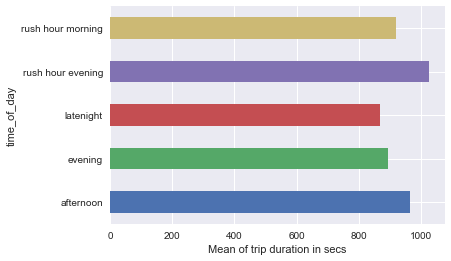

In [19]:
tdd = df.groupby(by="time_of_day")#trip duration varies as time of the day changes
duration = tdd["trip_duration"].mean()#average trip duration
plt.xlabel("Mean of trip duration in secs")
duration.plot(kind="barh")

Hypothesis Thesis Part :: Our critical value taken 0.05 if pvalue(alpha) which calculated is smaller than our alpha the mull hypothesis will be rejected.

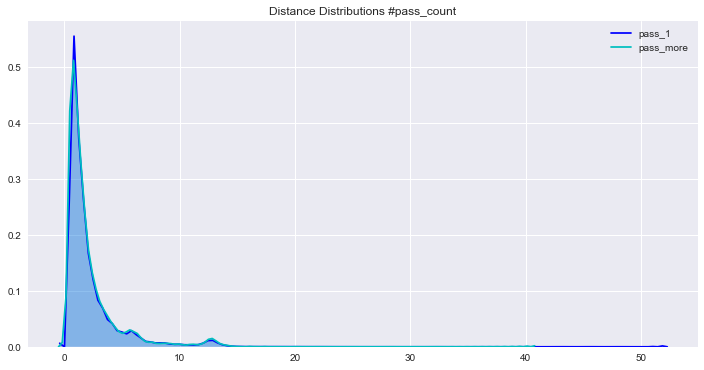

In [20]:
#Null hypothesis: passenger group size has no effect on the distance (the passenger_count=0 cases is rejected)
pass_1 = df[df["passenger_count"] == 1]["distance"] #taking the passenger count for "1" and "bigger than 1" these are our 2 sample space
pass_more=df[df["passenger_count"] > 1]["distance"] 


fig, ax = plt.subplots(1,1, figsize=(12,6)) 

sns.kdeplot(pass_1, shade=True, label="pass_1", ax=ax, color="b")
sns.kdeplot(pass_more, shade=True, label="pass_more", ax=ax, color="c")
plt.title("Distance Distributions #pass_count")
plt.show() #showing the distribution of group size vs distance

In [21]:
stats.f_oneway(pass_1, pass_more) #while the p-value is less than our critical value (0.05) the null hypothesis is rejected
# in this case; we conclude that a significant difference between the means exists 
#passenger group size has effect on the distance. One passenger usually goes more distance


F_onewayResult(statistic=24.590700576215017, pvalue=7.099103321778657e-07)

In [22]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"]) # datetime conversion

dow = df["pickup_datetime"].dt.weekday_name # returns days of week as variable

weekday = []

for i in dow: # labeling the days as weekdays and weekend for creating our 2 sample space
    if(i=="Monday"):
        weekday.append("weekdays")
    elif(i=="Tuesday"):
        weekday.append("weekdays")
    elif(i=="Wednesday"):
        weekday.append("weekdays")
    elif(i=="Thursday"):
        weekday.append("weekdays")
    elif(i=="Friday"):
        weekday.append("weekdays")
    elif(i=="Saturday"):
        weekday.append("weekend")
    else:
        weekday.append("weekend")
        
df["weekday"] = weekday # inserting new column
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush hour evening,weekdays
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Long Island City,3.182147,evening,weekdays
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Weehawken,0.927234,rush hour morning,weekdays
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Manhattan,1.225473,afternoon,weekdays
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon,weekdays
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,Hoboken,2.485830,evening,weekend
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Manhattan,2.645357,evening,weekdays
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon,weekdays
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening,weekdays
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,Long Island City,1.805032,latenight,weekdays


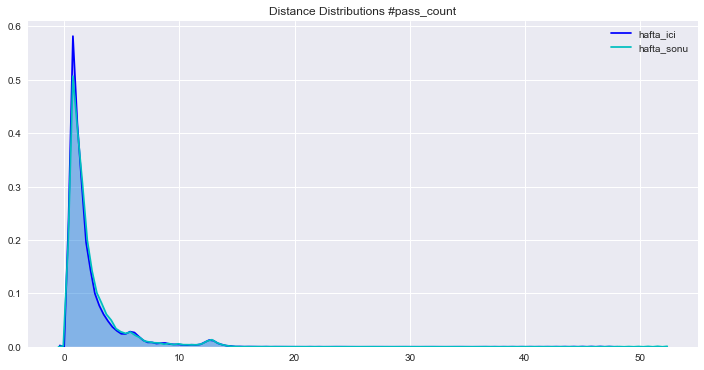

In [23]:
#Null hypothesis: The day of the week has no effect on the distance.

h_ici = df[df["weekday"] == "weekdays"]["distance"] # the making of 2 sample space which we want to observe
h_sonu=df[df["weekday"] == "weekend"]["distance"] 


fig, ax = plt.subplots(1,1, figsize=(12,6)) 

sns.kdeplot(h_ici, shade=True, label="hafta_ici", ax=ax, color="b")#plot attributes
sns.kdeplot(h_sonu, shade=True, label="hafta_sonu", ax=ax, color="c")
plt.title("Distance Distributions #pass_count")
plt.show() #showing the distribution of weekdays vs distance

In [25]:
stats.f_oneway(h_ici, h_sonu) #since the p_value of this is much less than our alpha(0.05) We can reject the null hypothesis
#Therefore the day of the week has effect on the distance. AT weekdays they are more road passed (distance is more)

F_onewayResult(statistic=31.432678102445482, pvalue=2.0693550758912806e-08)